In [41]:
import pandas as pd
import numpy as np

In [42]:
catfish_sales = pd.read_csv("catfish.csv")
catfish_sales.head()

,Date,Total
0,1986-1-01,9034
1,1986-2-01,9596
2,1986-3-01,10558
3,1986-4-01,9002
4,1986-5-01,9239


In [43]:
catfish_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    324 non-null    object
 1   Total   324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [44]:
catfish_sales['Date'] = pd.to_datetime(catfish_sales['Date'])
catfish_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    324 non-null    datetime64[ns]
 1   Total   324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [45]:
catfish_sales.head()

,Date,Total
0,1986-01-01,9034
1,1986-02-01,9596
2,1986-03-01,10558
3,1986-04-01,9002
4,1986-05-01,9239


In [46]:
catfish_sales['Date'].describe()

C:\Users\LPT-3036\AppData\Local\Temp\ipykernel_17480\1487841210.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  catfish_sales['Date'].describe()


count                     324
unique                    324
top       1986-01-01 00:00:00
freq                        1
first     1986-01-01 00:00:00
last      2012-12-01 00:00:00
Name: Date, dtype: object

In [47]:
catfish_sales.head()

,Date,Total
0,1986-01-01,9034
1,1986-02-01,9596
2,1986-03-01,10558
3,1986-04-01,9002
4,1986-05-01,9239


In [48]:
catfish_sales = catfish_sales.set_index('Date')

<AxesSubplot:xlabel='Date'>

<Figure size 1800x360 with 0 Axes>

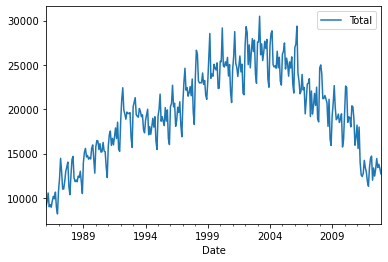

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,5))
catfish_sales.plot()

In [50]:
catfish_sales.head(10)

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239
1986-06-01,8951
1986-07-01,9668
1986-08-01,10188
1986-09-01,9896


In [51]:
# time period for training the model

start_date = '2000-01-01'
end_date = '2005-12-01'

train_catfish_sales = catfish_sales[start_date:end_date]
train_catfish_sales.head(10)

,Total
Date,
2000-01-01,25412
2000-02-01,25354
2000-03-01,29161
2000-04-01,24924
2000-05-01,24763
2000-06-01,25342
2000-07-01,24911
2000-08-01,25847
2000-09-01,23743


In [52]:
train_catfish_sales.rolling(6).mean().head(10)

,Total
Date,
2000-01-01,NaN
2000-02-01,NaN
2000-03-01,NaN
2000-04-01,NaN
2000-05-01,NaN
2000-06-01,25826.000000
2000-07-01,25742.500000
2000-08-01,25824.666667
2000-09-01,24921.666667


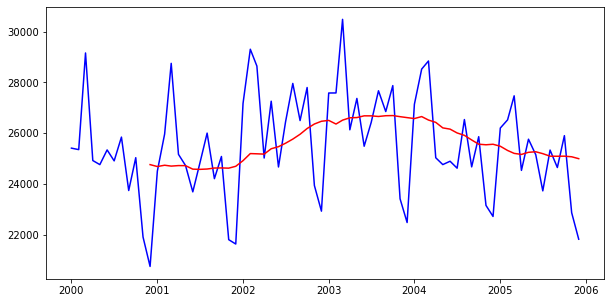

In [53]:
plt.figure(figsize=(10,5))

orig = plt.plot(train_catfish_sales, color='blue')

roll_mean = train_catfish_sales.rolling(12).mean()
plt.plot(roll_mean, color='red')

In [54]:
# check the stationarity

from statsmodels.tsa.stattools import adfuller

# null hypothesis : data is stationary
# alternate hyoothesis : not stationary

results = adfuller(train_catfish_sales)
results[1] # p-value

0.6470834714774281

In [55]:
train_catfish_sales.shift(1).head()

,Total
Date,
2000-01-01,NaN
2000-02-01,25412.0
2000-03-01,25354.0
2000-04-01,29161.0
2000-05-01,24924.0


In [56]:
# differencing first order

train_catfish_sales.head(10)

,Total
Date,
2000-01-01,25412
2000-02-01,25354
2000-03-01,29161
2000-04-01,24924
2000-05-01,24763
2000-06-01,25342
2000-07-01,24911
2000-08-01,25847
2000-09-01,23743


In [57]:
train_catfish_sales.shift(1).head()

,Total
Date,
2000-01-01,NaN
2000-02-01,25412.0
2000-03-01,25354.0
2000-04-01,29161.0
2000-05-01,24924.0


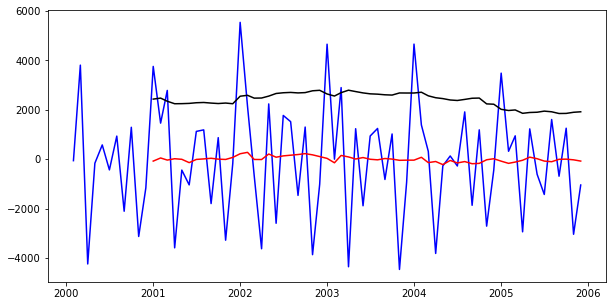

In [58]:
differenced_catfish_sales = train_catfish_sales - train_catfish_sales.shift(1)


plt.figure(figsize=(10,5))

orig = plt.plot(differenced_catfish_sales, color='blue')

roll_mean = differenced_catfish_sales.rolling(12).mean()
roll_std = differenced_catfish_sales.rolling(12).std()

plt.plot(roll_mean, color='red')
plt.plot(roll_std, color='black')

In [59]:
differenced_catfish_sales.shape

(72, 1)

In [60]:
differenced_catfish_sales.dropna().shape

(71, 1)

In [61]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(differenced_catfish_sales.dropna(), nlags=30)
lag_pacf = pacf(differenced_catfish_sales.dropna(), nlags=30)

In [62]:
len(lag_acf)

31

In [63]:
lag_pacf

array([ 1.        , -0.23429519, -0.14393494, -0.36522234, -0.52761478,
        0.03562732, -0.36076336,  0.31288833,  0.04506755, -0.29844225,
       -0.33184235, -0.57127755,  0.57334513,  0.28024834,  0.24248966,
        0.03008415, -0.02406142, -0.05905357, -0.36430752, -0.22584969,
        0.25371601,  0.55604751,  0.53711833, -0.72313968, -3.70037543,
        0.93359326, -7.74776833, -0.9574398 , -0.23532824,  0.81552982,
        0.46614878])

D:\Download\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


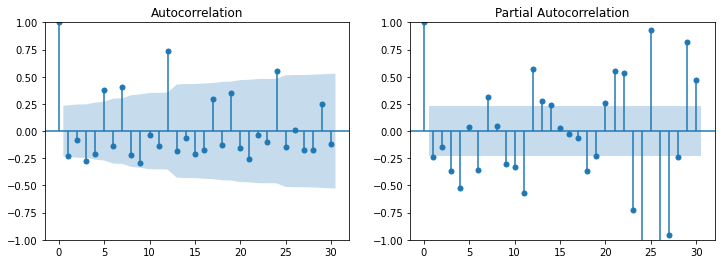

In [64]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(1,2,1)
fig = sm.graphics.tsa.plot_acf(differenced_catfish_sales.dropna(), lags=30, ax=ax1)

ax2 = fig.add_subplot(1,2,2)
fig = sm.graphics.tsa.plot_pacf(differenced_catfish_sales.dropna(), lags=30, ax=ax2)

In [65]:
from statsmodels.tsa.arima.model import ARIMA

In [66]:
differenced_catfish_sales_1 = differenced_catfish_sales.dropna()

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using z

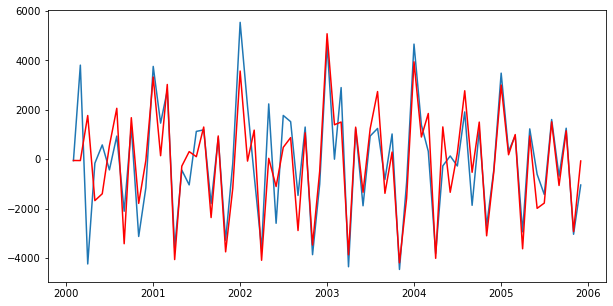

In [67]:
model = ARIMA(differenced_catfish_sales_1, order=(12,0,12))
results_arima = model.fit()


plt.figure(figsize=(10,5))
plt.plot(differenced_catfish_sales_1)
plt.plot(results_arima.fittedvalues, color='red')

In [81]:
# from datetime import timedelta

start_date = '2000-01-01'
end_date = '2005-12-01'

test_start = '2006-01-01'
test_end = '2006-12-01'

train_catfish_sales = catfish_sales[start_date:end_date]
test_catfish_sales = catfish_sales[end_date:test_end]

In [82]:
len(test_catfish_sales)

13

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using z

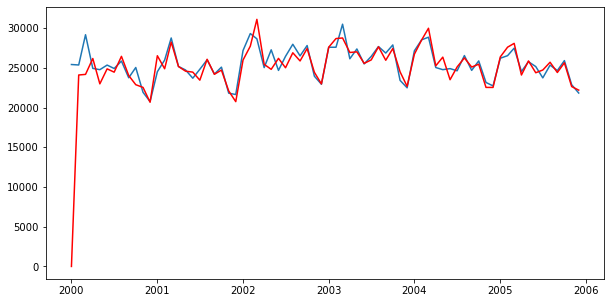

In [83]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_catfish_sales, order=(12,1,12))
results_arima = model.fit()

plt.figure(figsize=(10,5))
plt.plot(train_catfish_sales)
plt.plot(results_arima.fittedvalues, color='red')

In [84]:
results_arima.fittedvalues

Date
2000-01-01        0.000000
2000-02-01    24093.578279
2000-03-01    24169.178879
2000-04-01    26167.636619
2000-05-01    22979.444565
                  ...     
2005-08-01    25698.779197
2005-09-01    24406.477778
2005-10-01    25626.207933
2005-11-01    22637.118119
2005-12-01    22188.564493
Length: 72, dtype: float64

In [85]:
forecasted_vals_test = results_arima.forecast(len(test_catfish_sales))
forecasted_vals_test

2006-01-01    24950.535057
2006-02-01    26371.957280
2006-03-01    28045.233863
2006-04-01    24718.533351
2006-05-01    26102.794675
2006-06-01    24525.450336
2006-07-01    23792.794119
2006-08-01    25739.640430
2006-09-01    25100.146172
2006-10-01    26069.577148
2006-11-01    22765.851314
2006-12-01    22240.851924
2007-01-01    25010.514474
Freq: MS, Name: predicted_mean, dtype: float64

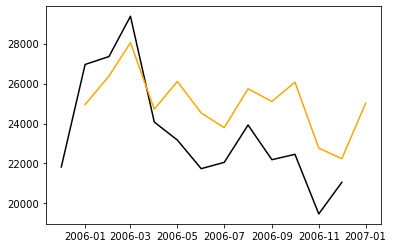

In [89]:
plt.plot(test_catfish_sales, color='black', label='test_actuals')
plt.plot(forecasted_vals_test, color = 'orange', label='test_forecasted')

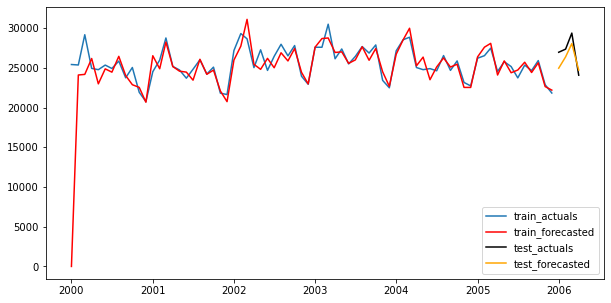

In [73]:
plt.figure(figsize=(10,5))

plt.plot(train_catfish_sales, label='train_actuals')
plt.plot(results_arima.fittedvalues, color='red', label='train_forecasted')

plt.plot(test_catfish_sales, color='black', label='test_actuals')
plt.plot(forecasted_vals_test, color = 'orange', label='test_forecasted')

plt.legend()

In [74]:
residuals = test_catfish_sales['Total']-forecasted_vals_test
residuals

Date
2006-01-01    2004.464943
2006-02-01     977.042720
2006-03-01    1321.766137
2006-04-01    -647.533351
dtype: float64

In [75]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(test_catfish_sales['Total'], forecasted_vals_test)) # rmse

1335.9320106407215

In [90]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

arima_order = (11, 1, 6)
seasonal_order = (2, 1, 2, 12)

model = SARIMAX(train_catfish_sales, order = arima_order, seasonal_order = seasonal_order)
model_fit = model.fit()

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to 

In [91]:
predictions = model_fit.forecast(len(test_catfish_sales))
predictions

2006-01-01    26470.424121
2006-02-01    26729.538563
2006-03-01    28564.117403
2006-04-01    24875.673790
2006-05-01    25398.981514
2006-06-01    24732.775900
2006-07-01    23772.930815
2006-08-01    25234.962930
2006-09-01    24080.872914
2006-10-01    25131.392273
2006-11-01    22173.673633
2006-12-01    21450.875411
2007-01-01    25894.960400
Freq: MS, Name: predicted_mean, dtype: float64

In [94]:
residuals = test_catfish_sales['Total']-predictions
residuals

2005-12-01            NaN
2006-01-01     484.575879
2006-02-01     619.461437
2006-03-01     802.882597
2006-04-01    -804.673790
2006-05-01   -2225.981514
2006-06-01   -2992.775900
2006-07-01   -1716.930815
2006-08-01   -1311.962930
2006-09-01   -1891.872914
2006-10-01   -2673.392273
2006-11-01   -2697.673633
2006-12-01    -394.875411
2007-01-01            NaN
dtype: float64

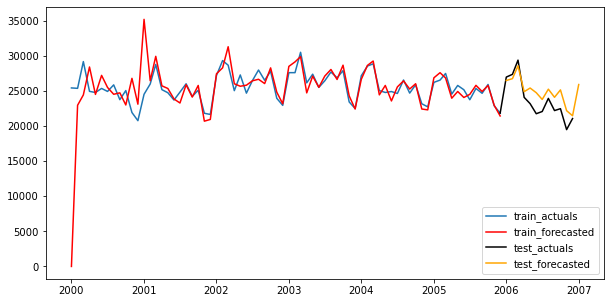

In [95]:
plt.figure(figsize=(10,5))

plt.plot(train_catfish_sales, label='train_actuals')
plt.plot(model_fit.fittedvalues, color='red', label='train_forecasted')

plt.plot(test_catfish_sales, color='black', label='test_actuals')
plt.plot(predictions, color = 'orange', label='test_forecasted')

plt.legend()

In [96]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(test_catfish_sales['Total'], predictions)) # rmse

2742.731325136508